##Подключаем нужные импорты

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

##Инициализация параметров:

In [ ]:
M_with_fuel = 553098
M_without_fuel_without_rocket_stage = 45970
M_without_fuel = 130970
time_of_flight = 310
changing_m_per_sec = (M_with_fuel - M_without_fuel) / time_of_flight

pressure_above_sea_level = 101325
painting_mass_of_dry_air = 0.029
g = 9.81
R = 8.31
T0 = 273.15 + 20
exp = math.e
pi = math.pi
impulse = 150
Cf = 0.5
r = 7.8
S = r ** 2 * pi

#Графики

###Давление вохдуха до выхода на орбиту

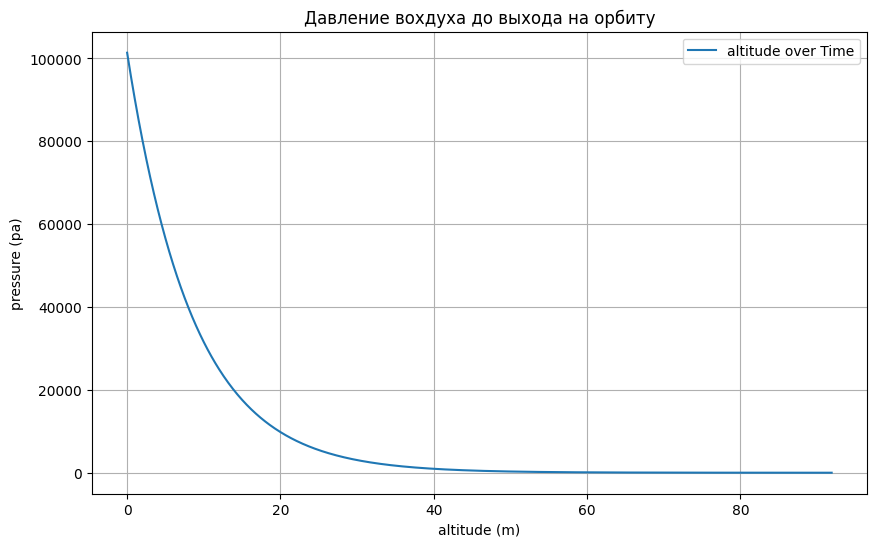

In [ ]:
mas = [i / 10 for i in range(0, 920)]
altitude_results = [
    pressure_above_sea_level * (exp ** ((-painting_mass_of_dry_air * g * h * 1000) / (R * T0)))
    for h in mas]
plt.figure(figsize=(10, 6))
plt.plot(mas, altitude_results, label='altitude over Time')
plt.xlabel('altitude (m)')
plt.ylabel('pressure (pa)')
plt.title('Давление вохдуха до выхода на орбиту')
plt.legend()
plt.grid(True)
plt.show()

###Плотность воздуха до выхода на орбиту

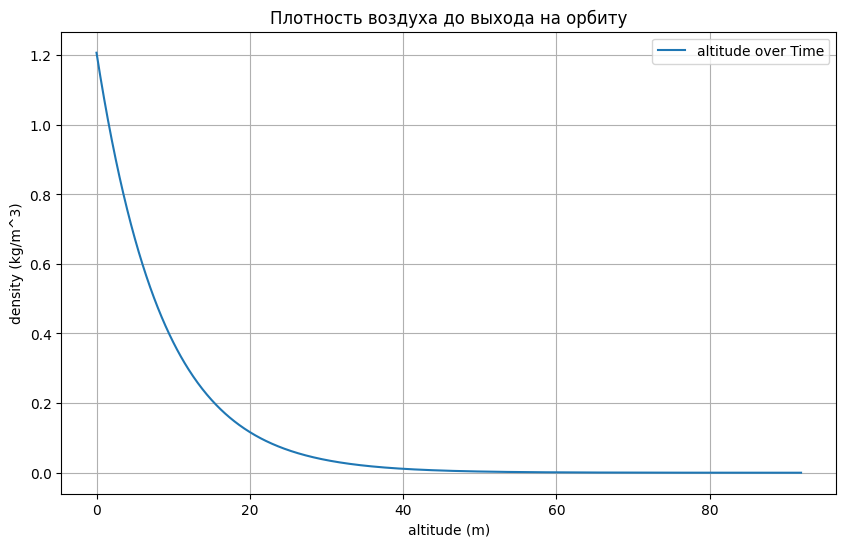

In [ ]:
mas = [i / 10 for i in range(0, 920)]
altitude_results = [
    pressure_above_sea_level * (
                exp ** ((-painting_mass_of_dry_air * g * h * 1000) / (R * T0)) * painting_mass_of_dry_air / (
                    R * T0))
    for h in mas]
plt.figure(figsize=(10, 6))
plt.plot(mas, altitude_results, label='altitude over Time')
plt.xlabel('altitude (m)')
plt.ylabel('density (kg/m^3)')
plt.title('Плотность воздуха до выхода на орбиту')
plt.legend()
plt.grid(True)
plt.show()


###График x и y от времени положения Луны

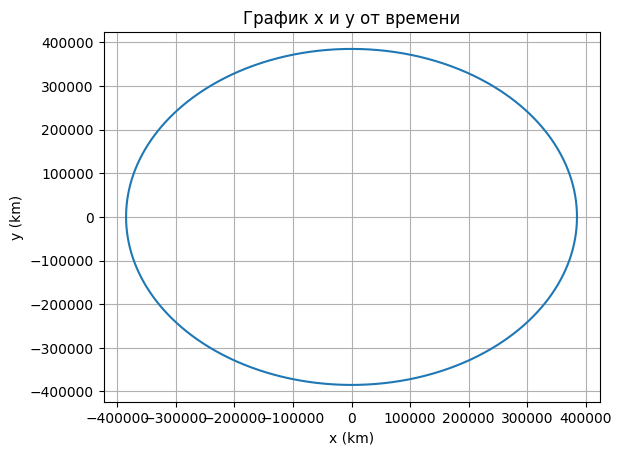

In [ ]:
t = np.linspace(0, 2358720, 1000)
x = 385000 * np.cos((2 * np.pi * t) / 2358720)
y = 385000 * np.sin((2 * np.pi * t) / 2358720)

plt.plot(x, y)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('График x и y от времени')
plt.grid(True)
plt.show()

###График x и y от времени положения Муны

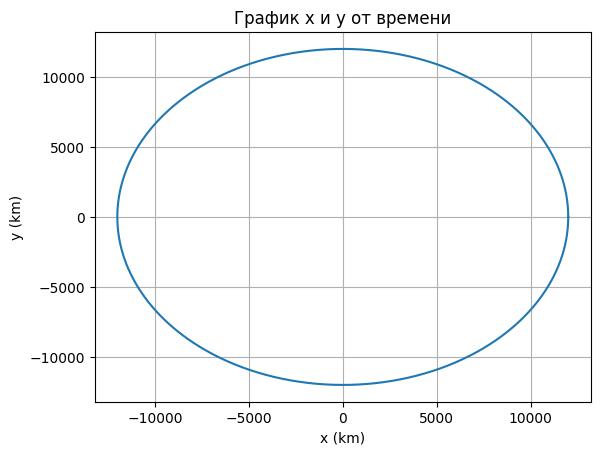

In [ ]:
t = np.linspace(0, 564192, 1000)
x = 12000 * np.cos((2 * np.pi * t) / 564192)
y = 12000 * np.sin((2 * np.pi * t) / 564192)

plt.plot(x, y)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('График x и y отвремени времени')
plt.grid(True)
plt.show()

###Масса в реальном полете

In [ ]:
import xlwings as xw

ModuleNotFoundError: ignored

In [ ]:
wb = xw.Book('ksp_data.csv').sheets[0]

In [3]:
# Константы
G = 6.6743 * 10 ** -11  # Гравитационная постоянная
RE = 600000  # Радиус Кербина
ME = 5.2915158 * 10 ** 22  # Масса Кербина
Cf = 0.5  # Коэффициент сопротивления среды

# Начальные значения
M = 573500  # Масса ракеты
Mf = 428000  # Масса топлива
Tfuel = 190  # Время, на которое хватит топлива
pi = math.pi
r = 7.8
S = r ** 2 * pi  # Площадь поверхности ракеты, на которую действует среда
THAU = 190  # Время полета
Density0 = 1.223125  # Плотность
T0 = 6750000  # Тяга в вакууме
T = 6418000  # Тяга двигателя у Земли
dT = T - T0
Thrust0 = T0 + dT * 1
k = 1.223125
P = 1 * (math.exp(-0 / 5000))  # Давление на высоте h
dt = 190 / 1000  # приращение времени за которое происходит изменение скорости

In [4]:
# Параметры графика (заполнение нулевых параметров)

t = np.linspace(0, THAU, 1000)
t2 = np.linspace(0, THAU - 51, 1000)  # подставил значение
h = np.zeros(len(t))
v = np.zeros(len(t))
m = np.zeros(len(t))
ays = np.zeros(len(t))
axs = np.zeros(len(t))
density = np.zeros(len(t))
vxs = np.zeros(len(t))
vys = np.zeros(len(t))
m[0] = M
vx = 0
vy = 0

In [5]:
# mas = [for i in range]
s_time = 0  # время при котором высота больше 10000м
Alpha = math.pi / 2
for i in range(1, len(t)):
    if h[i - 1] >= 9750 and h[i - 1] <= 10000:
        s_time = t2[i - 1]
    g = (G * ME) / ((RE + h[i - 1]) ** 2)  # ускорение свободного падения
    if h[i - 1] >= 10000:
        Alpha = (pi / 2) - ((pi * t2[i - 1]) / (190 * 2))  # угол
    Thrust = T0 + dT * (1 * (math.exp(-h[i - 1] / 5000)))  # тяга от высоты
    Fsop = 0.5 * Cf * S * (k * 1 * (math.exp(-h[i - 1] / 5000))) * (v[i - 1] ** 2)  # сила сопротивления
    Ftaz = m[i - 1] * g  # сила тяжести
    if h[i - 1] >= 10000:
        ax = (Thrust * np.cos(Alpha) - Fsop * np.cos(Alpha)) / m[i - 1]
        axs[i] = ax
        ay = (Thrust * np.sin(Alpha) - Fsop * np.sin(Alpha) - Ftaz) / m[i - 1]
        ays[i] = ay
    else:
        ax = (Thrust * 0 - Fsop * 0) / m[i - 1]
        axs[i] = ax
        ay = (Thrust * 1 - Fsop * 1 - Ftaz) / m[i - 1]
        ays[i] = ay
    vx += ax * dt
    vxs[i] = vx
    vy += ay * dt
    vys[i] = vy
    v[i] = (vx ** 2 + vy ** 2) ** 0.5
    m[i] = M - Mf * t[i] / Tfuel  # уменьшение массы ракеты
    h[i] = h[i - 1] + vy * dt  # увеличение высоты на которую поднимается ракета

##График взлета ракеты

In [ ]:
plt.plot(t, h)  # модель синяя
mass = wb.range('H2:H191').value
mas = [int(float(i)) for i in mass]
plt.plot(mas_time_of_flight, mas, color='r')  # реальность красная
plt.xlabel('Время, с')
plt.ylabel('Высота, м')
plt.title('График взлета ракеты')
plt.grid(True)
plt.show()

##График уменьшения массы ракеты

In [ ]:
plt.plot(t, m)
mass3 = wb.range('G2:G191').value
mas3 = [int(float(i)) * 1000 for i in mass3]
plt.plot(mas_time_of_flight, mas3, color='r')  # реальность красная
plt.xlabel('Время, с')
plt.ylabel('Масса, кг')
plt.title('График уменьшения массы ракеты')
plt.grid(True)
plt.show()

##График изменения скорости ракеты

In [ ]:
plt.plot(t, v)  # модель синяя
mass2 = wb.range('B2:B191').value
mas2 = [int(float(i)) for i in mass2]
plt.plot(mas_time_of_flight, mas2, color='r')  # реальность красная
plt.xlabel('Время, с')
plt.ylabel('Скорость, м/с')
plt.title('График изменения скорости ракеты')
plt.grid(True)
plt.show()